# Credits:- https://betterprogramming.pub/twitter-sentiment-analysis-15d8892c0082

# Twitter Data Sentiment Analysis
- 1) Twitter Data:- First step is to configure twitter API and gather twitter data
- 2) Clean the data
- 3) Sentiment:- To find out sentiments
- 4) Analysis:- To do analysis

In [ ]:
#!pip install tweepy 
#!pip install textblob 

In [86]:
import tweepy # to gather tweeter data
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

# Get the Twitter cong and get the tweets

In [7]:
# Twitter Api  Credentials
APIkey= "qBbo2B5vQxnDBtwqNTZ3C57UA"
APISecreatKey= "tbveShl1CGJPM706ybeIPIWGNZWBaXtsyAi8wZ6VgmiWR9AOGB"
accessToken= "1080866487819272192-VhW4s2WGskT3tg65eVeC6BdgRxMHpN"
accessTokenSecreat= "8EPbYCHl3aXculBl4SxfpCIsCsfEJxyoMIrZv6icU0oUJ"

In [8]:
# create the authentication object
authenticate = tweepy.OAuthHandler(APIkey,APISecreatKey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api= tweepy.API(authenticate)

In [28]:
posts= api.user_timeline(screen_name='Trump',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:  # just want to see the top 10 from 100
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) Savor the sweetness of @TrumpStore chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! https://t.co/J85ytVtmoR

2) RT @TrumpHotels: Spotted: The ever innovative @TrumpChicago's Burst Your Bubble cocktail in @millenniummagazine's Netflix + Chill(ed): 12 C…

3) Is @TrumpGolfLA on your bucket list? Take a virtual tour of our oceanfront public course and discover the challenging game and unrivaled scenic beauty that awaits: https://t.co/JNRMzmVc04. https://t.co/hEUhJWbKBX

4) Central Park is truly one of the wonders of the world. At our corporate headquarters in Trump Tower, we are delighted to enjoy this spectacular view every day, but especially on #EarthDay. https://t.co/SPnSnjlWol

5) Our @TrumpHotels #NeverSettle mantra has translated into nominations for the industry's top accolades! 

As you reflect on your favorite travel experiences with us, we would be honored to have your vote. Cast your ballot at https://t

In [29]:
# Create a dataframe with a column called tweets
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,Savor the sweetness of @TrumpStore chocolates ...
1,RT @TrumpHotels: Spotted: The ever innovative ...
2,Is @TrumpGolfLA on your bucket list? Take a vi...
3,Central Park is truly one of the wonders of th...
4,Our @TrumpHotels #NeverSettle mantra has trans...
...,...
95,Revel in this majestic scene of the iconic @Tr...
96,Step away from the bustling city streets and i...
97,Our story began more than four decades ago wit...
98,RT @TrumpGolf: Happy #NationalBossDay to the l...


In [32]:
# make a function to clean tweets
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [34]:
df['Tweets']= df['Tweets'].apply(cleanTxt)

In [35]:
df

,Tweets
0,Savor the sweetness of chocolates all summer ...
1,: Spotted: The ever innovative 's Burst Your B...
2,Is on your bucket list? Take a virtual tour o...
3,Central Park is truly one of the wonders of th...
4,Our NeverSettle mantra has translated into no...
...,...
95,Revel in this majestic scene of the iconic Li...
96,Step away from the bustling city streets and i...
97,Our story began more than four decades ago wit...
98,: Happy NationalBossDay to the leaders of our ...


# Lets find out the sentiments

In [68]:
analysis=TextBlob("Today was the best day ")

In [69]:
analysis.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [71]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [76]:
df

,Tweets,Subjectivity,Polarity
0,Savor the sweetness of chocolates all summer ...,0.400000,-0.062500
1,: Spotted: The ever innovative 's Burst Your B...,1.000000,0.500000
2,Is on your bucket list? Take a virtual tour o...,0.488889,0.033333
3,Central Park is truly one of the wonders of th...,0.558333,0.283333
4,Our NeverSettle mantra has translated into no...,0.750000,0.562500
...,...,...,...
95,Revel in this majestic scene of the iconic Li...,0.716667,0.450000
96,Step away from the bustling city streets and i...,0.000000,0.000000
97,Our story began more than four decades ago wit...,0.750000,0.750000
98,: Happy NationalBossDay to the leaders of our ...,1.000000,1.000000


# Lets do Analysis

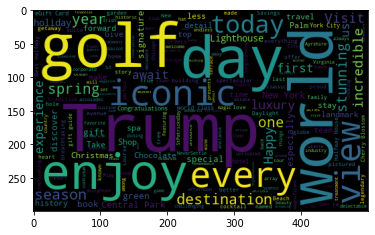

In [78]:
# Word Cloud Visualization
allwords= ' '.join([i for i in df['Tweets']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [79]:
# Create a function to compute negative neutral and positive

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Savor the sweetness of chocolates all summer ...,0.400000,-0.062500,Negative
1,: Spotted: The ever innovative 's Burst Your B...,1.000000,0.500000,Positive
2,Is on your bucket list? Take a virtual tour o...,0.488889,0.033333,Positive
3,Central Park is truly one of the wonders of th...,0.558333,0.283333,Positive
4,Our NeverSettle mantra has translated into no...,0.750000,0.562500,Positive
...,...,...,...,...
95,Revel in this majestic scene of the iconic Li...,0.716667,0.450000,Positive
96,Step away from the bustling city streets and i...,0.000000,0.000000,Neutral
97,Our story began more than four decades ago wit...,0.750000,0.750000,Positive
98,: Happy NationalBossDay to the leaders of our ...,1.000000,1.000000,Positive


In [94]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
7,Discover the ultimate golf resort experience a...,1.000,0.0,Neutral
10,We’re spending NationalBeerDay with a decadent...,0.000,0.0,Neutral
11,: Spring Toward Travel with ! Featuring a spri...,0.000,0.0,Neutral
19,If we could be anywhere in the world this StPa...,0.000,0.0,Neutral
29,: Weekends were made for our signature Martini...,0.000,0.0,Neutral
30,: Friday plans? You'll find us lounging at the...,0.000,0.0,Neutral
32,Our signature Trump clock stands out in every ...,0.000,0.0,Neutral
33,: From championship golf to world-class scotch...,0.000,0.0,Neutral
80,Host in elegance and style this holiday season...,0.000,0.0,Neutral
96,Step away from the bustling city streets and i...,0.000,0.0,Neutral


In [90]:
df['Analysis'].value_counts()

Positive    87
Neutral     11
Negative     2
Name: Analysis, dtype: int64

In [91]:
df.shape

(100, 4)

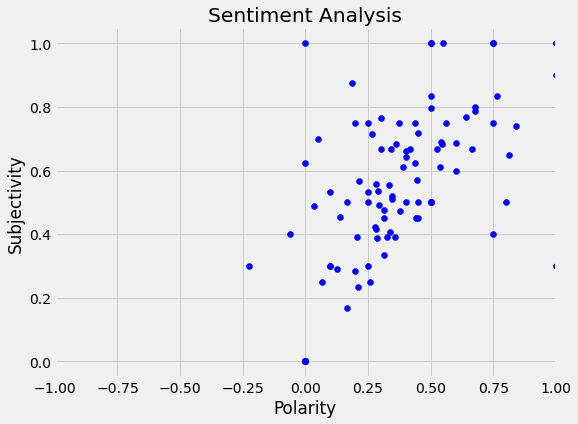

In [95]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Only 3 neutral it is showing because it is overlapping

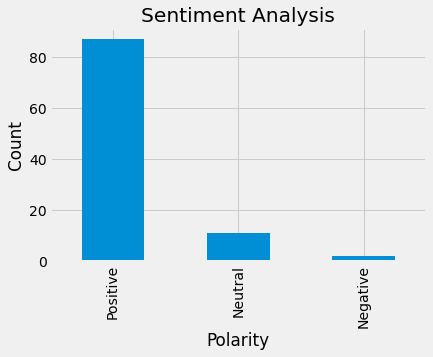

In [97]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [101]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Positive'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) : Spotted: The ever innovative 's Burst Your Bubble cocktail in 's Netflix + Chill(ed): 12 C…

2) Is  on your bucket list? Take a virtual tour of our oceanfront public course and discover the challenging game and unrivaled scenic beauty that awaits:  

3) Central Park is truly one of the wonders of the world. At our corporate headquarters in Trump Tower, we are delighted to enjoy this spectacular view every day, but especially on EarthDay. 

4) Our  NeverSettle mantra has translated into nominations for the industry's top accolades! 

As you reflect on your favorite travel experiences with us, we would be honored to have your vote. Cast your ballot at  

5) : Ballots are open! Several TrumpHotels have been nominated for the industry's top accolades ✨ As you share your favorite t…

6) Exquisite atmosphere, delectable cuisine, and 18 holes of world-class golf. We love escaping to  for a relaxing afternoon away from New York City.  

7) We are delighted to welcome you back to  on April

In [104]:
# Lets get negative tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Negative'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) Savor the sweetness of  chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! 

2) : Not content with just donning green hats, everything from buildings to rivers goes green for St Patrick's Day! 
St. Patri…



In [105]:
# Lets get neutral tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Neutral'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) Discover the ultimate golf resort experience at , where luxury is woven into every detail. 

📷:  

2) We’re spending NationalBeerDay with a decadent burger followed by a lavish afternoon on the white sand beaches of . 

3) : Spring Toward Travel with ! Featuring a spring themed amenity and a generous credit towards dining, their off…

4) If we could be anywhere in the world this StPatricksDay, we'd be at , where Irish history and tradition is woven into every detail. 

5) : Weekends were made for our signature Martinis 🍸 What are you sipping on today? 

6) : Friday plans? You'll find us lounging at the Royal Palm Pool. 

7) Our signature Trump clock stands out in every setting. 

8) : From championship golf to world-class scotch and everything in between, our annual TrumpChallenge was one for the books! Co…

9) Host in elegance and style this holiday season. Shop our  gift guide “For the Entertainer:”  

10) Step away from the bustling city streets and into your escape at Trump Park